In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded CSV into a DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()


Saving sales_data_sample.csv to sales_data_sample.csv


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 5327: invalid start byte

In [2]:
# Read the uploaded CSV with the correct encoding
df = pd.read_csv(file_name, encoding='ISO-8859-1')
df.head()  # Display the first 5 rows

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values


,0
ADDRESSLINE2,2521
STATE,1486
POSTALCODE,76
TERRITORY,1074


In [4]:
# Fill numerical missing values with the column mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical missing values with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Verify no missing values remain
df.isnull().sum()


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


To see which col are selected

In [5]:
print(num_cols)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')


 Correlation Between Numerical Features
Let’s see how the numerical columns are related:Calculates how strongly features are related, brighter colors show stronger relationships.

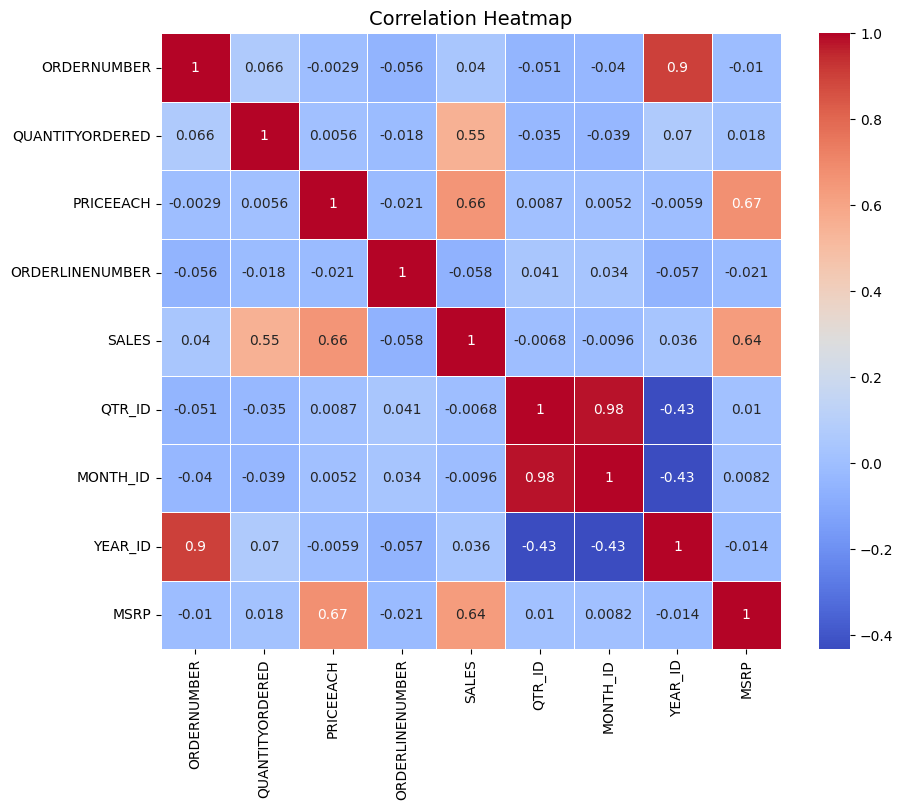

In [7]:
# Select only numerical columns for correlation
num_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


In [8]:
# Export the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


In [ ]:
files.download('cleaned_data.csv')
